In [18]:
import pandas as pd
from collections import Counter
import re
import statistics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('job_offers.xlsx')
df = pd.DataFrame(df)
df = df.fillna('')

In [3]:
df

,Position,Salary,Status,Skill 1,Skill 2,Skill 3
0,Salesforce Developer,20 000 - 35 000 pln,New,SOAP API,Apex,
1,Python Developer,12 000 - 20 000 pln,New,,,
2,Senior PHP Developer,18 000 - 24 000 pln,New,PHP,OOP,MySQL
3,Senior Software Engineer,25 717 - 38 575 pln,New,API,,
4,Senior QA Analyst,12 000 - 20 000 pln,New,MongoDB,browserstack,
...,...,...,...,...,...,...
816,Senior AQA (C#) Engineer,17 407 - 22 049 pln,7d ago,Web Application Testing,SQL,C#
817,Business Intelligence Analyst,9 500 - 14 000 pln,7d ago,Power BI,DAX,SQL
818,MS Dynamics 365 Developer,22 000 - 24 000 pln,7d ago,Microsoft Dynamics 365,Microsoft Power Platform,SSIS packages
819,Analityk systemowy,20 000 - 22 500 pln,7d ago,REST,BPMN,SQL


In [4]:
df['Skills'] = df['Skill 1'] + ', ' + df['Skill 2'] + ', ' + df['Skill 3']
df = df.drop(columns = ['Skill 1', 'Skill 2', 'Skill 3'])
df

,Position,Salary,Status,Skills
0,Salesforce Developer,20 000 - 35 000 pln,New,"SOAP API, Apex,"
1,Python Developer,12 000 - 20 000 pln,New,", ,"
2,Senior PHP Developer,18 000 - 24 000 pln,New,"PHP, OOP, MySQL"
3,Senior Software Engineer,25 717 - 38 575 pln,New,"API, ,"
4,Senior QA Analyst,12 000 - 20 000 pln,New,"MongoDB, browserstack,"
...,...,...,...,...
816,Senior AQA (C#) Engineer,17 407 - 22 049 pln,7d ago,"Web Application Testing, SQL, C#"
817,Business Intelligence Analyst,9 500 - 14 000 pln,7d ago,"Power BI, DAX, SQL"
818,MS Dynamics 365 Developer,22 000 - 24 000 pln,7d ago,"Microsoft Dynamics 365, Microsoft Power Platfo..."
819,Analityk systemowy,20 000 - 22 500 pln,7d ago,"REST, BPMN, SQL"


In [5]:
# List of seperators to consider
separators = [',', '/', ';']

# Function to separate by different separators
def split_skills(skills, separators):
    pattern = '|'.join(map(re.escape, separators))
    return [skill.strip() for skill in re.split(pattern, skills) if skill.strip()]

# Counting the occurrences of each skill
all_skills = []
for skills in df['Skills']:
    all_skills.extend(split_skills(skills, separators))

In [6]:
skill_counts = Counter(all_skills)

In [7]:
skill_counts_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])

In [8]:
skill_counts_df = skill_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
print(f'Top 20 most demanded skills\n {skill_counts_df.head(20).to_string()}')

Top 20 most demanded skills
          Skill  Count
0      English    119
1          SQL     96
2       Python     85
3         Java     75
4   JavaScript     47
5          AWS     40
6   TypeScript     38
7        React     37
8        Linux     33
9           C#     30
10       Agile     29
11         Git     27
12          CI     26
13          CD     26
14        .Net     26
15       Azure     24
16      Polish     23
17        JIRA     22
18  Kubernetes     20
19         SAP     20


In [9]:
df

,Position,Salary,Status,Skills
0,Salesforce Developer,20 000 - 35 000 pln,New,"SOAP API, Apex,"
1,Python Developer,12 000 - 20 000 pln,New,", ,"
2,Senior PHP Developer,18 000 - 24 000 pln,New,"PHP, OOP, MySQL"
3,Senior Software Engineer,25 717 - 38 575 pln,New,"API, ,"
4,Senior QA Analyst,12 000 - 20 000 pln,New,"MongoDB, browserstack,"
...,...,...,...,...
816,Senior AQA (C#) Engineer,17 407 - 22 049 pln,7d ago,"Web Application Testing, SQL, C#"
817,Business Intelligence Analyst,9 500 - 14 000 pln,7d ago,"Power BI, DAX, SQL"
818,MS Dynamics 365 Developer,22 000 - 24 000 pln,7d ago,"Microsoft Dynamics 365, Microsoft Power Platfo..."
819,Analityk systemowy,20 000 - 22 500 pln,7d ago,"REST, BPMN, SQL"


In [10]:
def create_Salary_list(DataFrame):

  salary_list = []

  for salary in DataFrame['Salary']:
      if salary != 'Undisclosed Salary':
          salary = re.split('-|pln', salary)
          for s in salary:
              if len(s.strip()) <= 3: # ignoring hourly rates because almost all rates in the table are monthly
                  continue
              if s.strip():
                  cleaned_salary = s.strip().replace(' ', '')
                  salary_list.append(int(cleaned_salary))
  return salary_list

In [11]:
def makeSummary(DataFrame, position):
  salary_list = create_Salary_list(DataFrame)

  average_salary = sum(salary_list) / len(salary_list)
  print(f'{position.capitalize()} can count on an average salary of: {round(average_salary, 2)} pln')

  median_salary = statistics.median(salary_list)
  print(f'The median salary is: {round(median_salary, 2)} pln')

  minimum_salary = min(salary_list)
  print(f'The minimum salary is: {round(minimum_salary, 2)} pln')

  maximum_salary = max(salary_list)
  print(f'The maximum salary is: {round(maximum_salary, 2)} pln')

  print(f'Offers: {len(DataFrame)}')
  print(f'Percentage of all offers: {round((len(DataFrame) / len(df)) * 100)}% \n')

makeSummary(df, 'Employee')

Employee can count on an average salary of: 20389.54 pln
The median salary is: 20000 pln
The minimum salary is: 4400 pln
The maximum salary is: 65520 pln
Offers: 821
Percentage of all offers: 100% 



In [12]:
df_junior = df.loc[df['Position'].str.contains('junior|młodszy|associate|entry|graduate', case = False)].reset_index(drop=True)
df_senior = df.loc[df['Position'].str.contains('senior|lead|starszy|head|principal|expert', case = False)].reset_index(drop=True)
df_remaining = df.loc[~df['Position'].str.contains('senior|lead|starszy|head|principal|expert|junior|młodszy|associate|entry|graduate', case = False)].reset_index(drop=True)

In [13]:
df_junior

,Position,Salary,Status,Skills
0,Junior Frontend Developer (React.js),6 000 - 9 000 pln,New,"Polish, ,"
1,Junior Front-End Developer,Undisclosed Salary,New,"CSS/SCSS, JavaScript ES6+, JavaScript ES"
2,Junior PHP Developer,5 000 - 6 000 pln,New,"PHP version 7 and higher, MySQL, REST API"
3,Junior Python Engineer with Networks,7 000 - 14 000 pln,New,"Networks, Git, Windows"
4,Junior Product Support Specialist,5 802 - 6 963 pln,New,"English, Zendesk,"
5,Junior Network Security Engineer with Python,8 000 - 15 000 pln,New,"English, Network Security, Linux"
6,Junior Backend Developer (Python),6 000 - 10 000 pln,New,"Polish, English, Python"
7,Junior Product Support Specialist (Fintech),5 500 - 8 500 pln,New,"IT Support, Customer Support, FinTech"
8,Junior Product Manager,Undisclosed Salary,New,"Agile, Product Management,"
9,Junior DevOps Engineer,9 000 - 13 000 pln,New,"Polish, English, CI/CD"


In [14]:
df_senior

,Position,Salary,Status,Skills
0,Senior PHP Developer,18 000 - 24 000 pln,New,"PHP, OOP, MySQL"
1,Senior Software Engineer,25 717 - 38 575 pln,New,"API, ,"
2,Senior QA Analyst,12 000 - 20 000 pln,New,"MongoDB, browserstack,"
3,Senior Backend Engineer,25 530 - 44 871 pln,New,"Python, fastapi,"
4,Senior DevOps Engineer,18 000 - 22 000 pln,New,", ,"
...,...,...,...,...
298,Senior BI Developer - Zespół Data Intelligence...,Undisclosed Salary,6d ago,"English, ALM Toolkit, tabular editor"
299,Senior ColdFusion Engineer,5 000 - 5 500 pln,7d ago,"ColdFusion, ,"
300,Lead Full Stack .NET Engineer,25 143 - 29 785 pln,7d ago,".NET MVC, .NET Core, .NET C#"
301,Senior AQA (C#) Engineer,17 407 - 22 049 pln,7d ago,"Web Application Testing, SQL, C#"


In [15]:
df_remaining

,Position,Salary,Status,Skills
0,Salesforce Developer,20 000 - 35 000 pln,New,"SOAP API, Apex,"
1,Python Developer,12 000 - 20 000 pln,New,", ,"
2,.NET Developer,17 000 - 19 000 pln,New,"ASP.NET, SQL Server,"
3,Data Scientist - Location Intelligence,Undisclosed Salary,New,"English, ML, Data analysis"
4,Power BI Developer,20 200 - 25 200 pln,New,"Power BI, DAX,"
...,...,...,...,...
490,Fullstack Developer,10 000 - 14 000 pln,7d ago,"English, Linux, Python"
491,Solution Architect – Data Platform Modernizati...,30 945 - 38 682 pln,7d ago,"Cloud Data Platform, Data Lakehouse, Snowflake"
492,Business Intelligence Analyst,9 500 - 14 000 pln,7d ago,"Power BI, DAX, SQL"
493,MS Dynamics 365 Developer,22 000 - 24 000 pln,7d ago,"Microsoft Dynamics 365, Microsoft Power Platfo..."


## **Summary**

In [16]:
makeSummary(df, 'Employee')
makeSummary(df_junior, 'Junior')
makeSummary(df_senior, 'Senior')
makeSummary(df_remaining, 'employees not identified as senior or junior')
print(f'Top 20 most demanded skills\n {skill_counts_df.head(20).to_string()}')

Employee can count on an average salary of: 20389.54 pln
The median salary is: 20000 pln
The minimum salary is: 4400 pln
The maximum salary is: 65520 pln
Offers: 821
Percentage of all offers: 100% 

Junior can count on an average salary of: 8786.41 pln
The median salary is: 8000.0 pln
The minimum salary is: 4400 pln
The maximum salary is: 16500 pln
Offers: 23
Percentage of all offers: 3% 

Senior can count on an average salary of: 23735.97 pln
The median salary is: 23000 pln
The minimum salary is: 5000 pln
The maximum salary is: 65520 pln
Offers: 303
Percentage of all offers: 37% 

Employees not identified as senior or junior can count on an average salary of: 18366.7 pln
The median salary is: 17000.0 pln
The minimum salary is: 4800 pln
The maximum salary is: 47000 pln
Offers: 495
Percentage of all offers: 60% 

Top 20 most demanded skills
          Skill  Count
0      English    119
1          SQL     96
2       Python     85
3         Java     75
4   JavaScript     47
5          AWS 

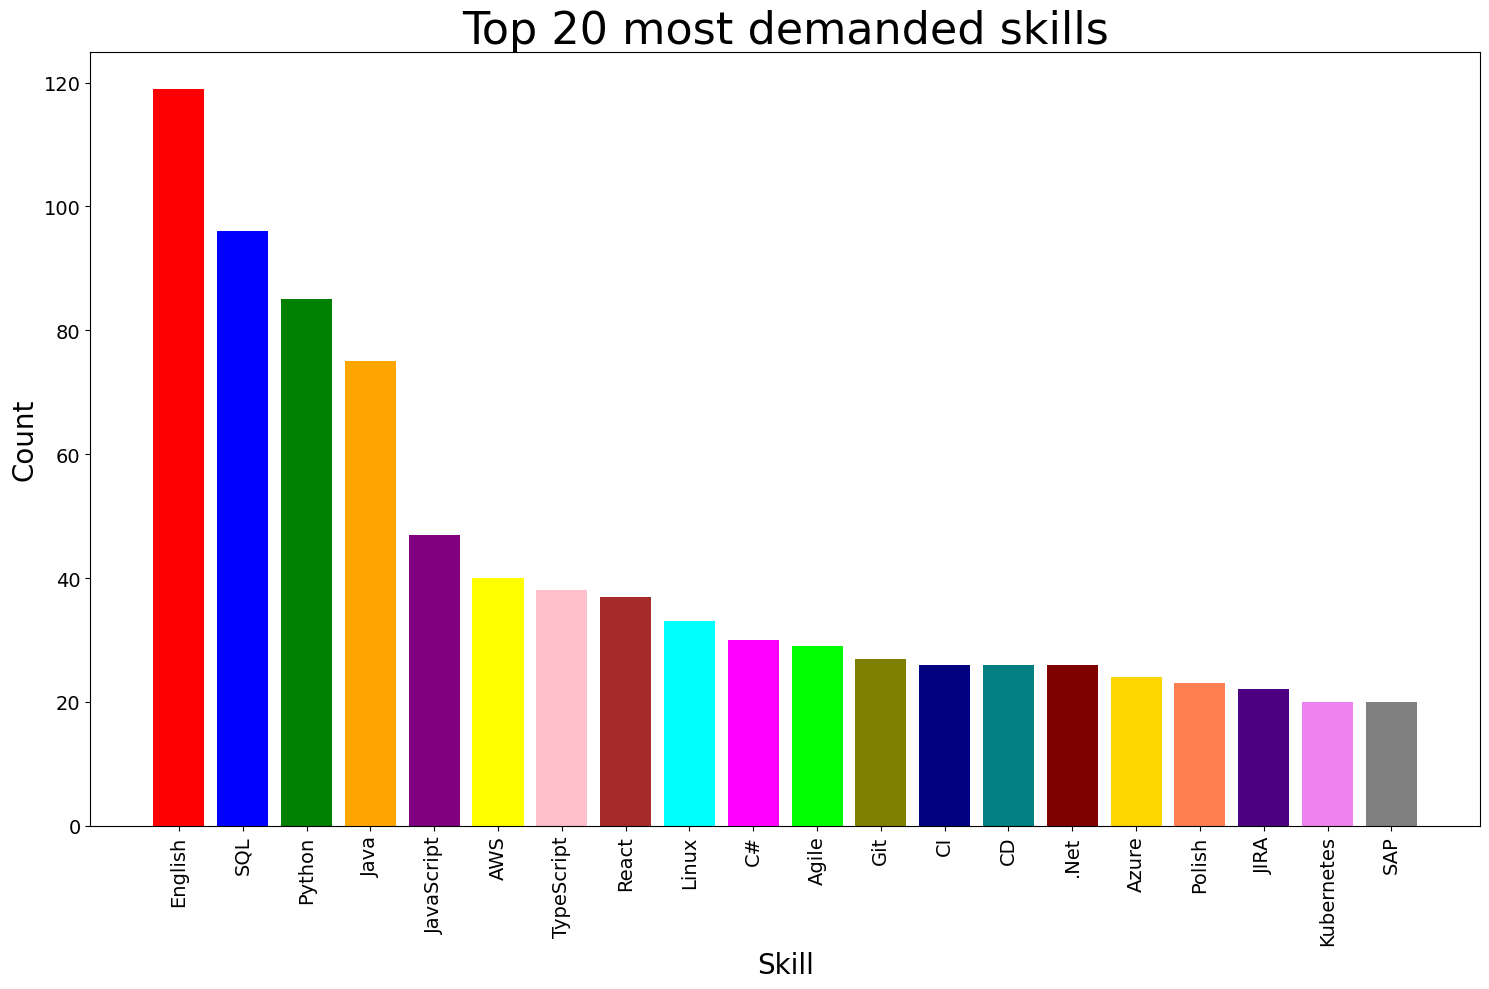

In [67]:
skill = skill_counts_df['Skill'].head(20)
count = skill_counts_df['Count'].head(20)

colors = [
    'red', 'blue', 'green', 'orange', 'purple',
    'yellow', 'pink', 'brown', 'cyan', 'magenta',
    'lime', 'olive', 'navy', 'teal', 'maroon',
    'gold', 'coral', 'indigo', 'violet', 'grey'
]

plt.figure(figsize=(15, 10))
plt.title('Top 20 most demanded skills', fontsize = 32)
plt.xlabel('Skill', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.bar(skill, count, color=colors)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()

plt.savefig('Top 20 most demanded skills.png', dpi=300)
plt.show()